## Basics of Forecasting: NBA Data Set

### 1. Data Preparation

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [3]:
#Import Data
NBA = pd.read_csv("Assignment Data/NBA_Games2.csv")

In [4]:
#Display Data
NBA.head()

,CITY,TEAM_NAME,TEAM_ID,NICKNAME,STATE,YEAR_FOUNDED,SEASON_ID,TEAM_ABBREVIATION,GAME_ID,GAME_DATE,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,WIN
0,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22019,ATL,1521900072,2019-07-12,...,13,23,36,14,15,3,12,24,8.0,1
1,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22019,ATL,1521900060,2019-07-11,...,9,28,37,19,10,8,22,25,-5.0,0
2,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22019,ATL,1521900042,2019-07-09,...,7,27,34,17,5,5,18,21,18.2,1
3,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22019,ATL,1521900023,2019-07-07,...,9,27,36,7,7,10,18,28,-24.0,0
4,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22019,ATL,1521900013,2019-07-06,...,9,30,39,13,11,6,13,21,2.0,0


In [5]:
# Filter 2017 regular season encoded with '22017'
# Note: All the pre-season games are recorded with GAME_ID larger than 1000000000.  
NBA17 = NBA[(NBA.SEASON_ID == 22017) & (NBA.GAME_ID < 1000000000)]
display(NBA17[0:10])

,CITY,TEAM_NAME,TEAM_ID,NICKNAME,STATE,YEAR_FOUNDED,SEASON_ID,TEAM_ABBREVIATION,GAME_ID,GAME_DATE,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,WIN
101,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701214,2018-04-10,...,8,31,39,27,10,3,10,24,-8.0,0
102,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701202,2018-04-08,...,5,32,37,23,7,4,13,19,6.0,1
103,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701184,2018-04-06,...,7,43,50,24,5,5,18,22,6.0,1
104,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701172,2018-04-04,...,10,38,48,20,5,6,15,16,-29.0,0
105,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701158,2018-04-03,...,12,37,49,24,10,1,15,15,-3.0,0
106,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701147,2018-04-01,...,5,47,52,33,0,3,14,15,6.0,1
107,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701130,2018-03-30,...,15,44,59,24,9,4,16,14,-10.0,0
108,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701120,2018-03-28,...,4,33,37,26,10,2,19,22,-6.0,0
109,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701101,2018-03-25,...,7,38,45,18,5,2,13,14,-19.0,0
110,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701087,2018-03-23,...,5,39,44,24,5,5,11,14,-12.0,0


In [6]:
# Display columns of the data
NBA17.columns

Index(['CITY', 'TEAM_NAME', 'TEAM_ID', 'NICKNAME', 'STATE', 'YEAR_FOUNDED',
       'SEASON_ID', 'TEAM_ABBREVIATION', 'GAME_ID', 'GAME_DATE', 'MATCHUP',
       'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT',
       'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PLUS_MINUS', 'WIN'],
      dtype='object')

In [7]:
# Select columns used for forecasting model: 'GAME_ID', 'TEAM_NAME', 'GAME_DATE','PTS','PLUS_MINUS', 'WIN'
NBA17 = NBA17[['GAME_ID', 'TEAM_NAME', 'GAME_DATE','PTS','PLUS_MINUS', 'WIN']]

display(NBA17[0:10])

,GAME_ID,TEAM_NAME,GAME_DATE,PTS,PLUS_MINUS,WIN
101,21701214,Atlanta Hawks,2018-04-10,113,-8.0,0
102,21701202,Atlanta Hawks,2018-04-08,112,6.0,1
103,21701184,Atlanta Hawks,2018-04-06,103,6.0,1
104,21701172,Atlanta Hawks,2018-04-04,86,-29.0,0
105,21701158,Atlanta Hawks,2018-04-03,98,-3.0,0
106,21701147,Atlanta Hawks,2018-04-01,94,6.0,1
107,21701130,Atlanta Hawks,2018-03-30,91,-10.0,0
108,21701120,Atlanta Hawks,2018-03-28,114,-6.0,0
109,21701101,Atlanta Hawks,2018-03-25,99,-19.0,0
110,21701087,Atlanta Hawks,2018-03-23,94,-12.0,0


In [8]:
# Subset the data for forecasting: 
# Tip: You can roughly split the data half and half by using the 'GAME_ID' column (the balance point: GAME_ID == 21700616)
NBA17_pre = NBA17[NBA17.GAME_ID <= 21700615].copy()

#Check out the output
NBA17_pre.sort_values("GAME_ID", axis = 0, ascending = True, 
                 inplace = True, na_position ='last') 

#Display the data
NBA17_pre.head()

,GAME_ID,TEAM_NAME,GAME_DATE,PTS,PLUS_MINUS,WIN
846,21700001,Boston Celtics,2017-10-17,99,-3.0,0
1501,21700001,Cleveland Cavaliers,2017-10-17,102,3.0,1
5328,21700002,Houston Rockets,2017-10-17,122,1.0,1
4630,21700002,Golden State Warriors,2017-10-17,121,-1.0,0
18110,21700003,Charlotte Hornets,2017-10-18,90,-12.0,0


In [9]:
NBA17_post = NBA17[NBA17.GAME_ID > 21700615].copy()

NBA17_post.sort_values("GAME_ID", axis = 0, ascending = True, 
                 inplace = True, na_position ='last') 

NBA17_post.head()

,GAME_ID,TEAM_NAME,GAME_DATE,PTS,PLUS_MINUS,WIN
12993,21700616,Sacramento Kings,2018-01-11,115,-6.0,0
6178,21700617,Los Angeles Lakers,2018-01-11,93,12.0,1
13594,21700617,San Antonio Spurs,2018-01-11,81,-12.0,0
18071,21700618,Charlotte Hornets,2018-01-12,99,11.0,1
15595,21700618,Utah Jazz,2018-01-12,88,-11.0,0


In [10]:
# Create a new column named 'PTS_AGN' for creating the Pyth %
NBA17_pre['PTS_AGN'] = NBA17_pre['PTS'] - NBA17_pre['PLUS_MINUS']

NBA17_pre.head()

,GAME_ID,TEAM_NAME,GAME_DATE,PTS,PLUS_MINUS,WIN,PTS_AGN
846,21700001,Boston Celtics,2017-10-17,99,-3.0,0,102.0
1501,21700001,Cleveland Cavaliers,2017-10-17,102,3.0,1,99.0
5328,21700002,Houston Rockets,2017-10-17,122,1.0,1,121.0
4630,21700002,Golden State Warriors,2017-10-17,121,-1.0,0,122.0
18110,21700003,Charlotte Hornets,2017-10-18,90,-12.0,0,102.0


In [11]:
# Aggregate game level statistics to a team level statistics for forecasting
NBA17_pre_team = NBA17_pre.groupby(['TEAM_NAME'])['WIN', 'PTS', 'PTS_AGN'].sum()

NBA17_pre_team.head()

,WIN,PTS,PTS_AGN
TEAM_NAME,,,
Atlanta Hawks,11,4262,4443.6
Boston Celtics,34,4532,4299.8
Brooklyn Nets,15,4342,4473.6
Charlotte Hornets,15,4102,4140.0
Chicago Bulls,15,4295,4551.0


In [12]:
# Create a new column containing the number of games played for the first half of the regular season
## Note: While the balance point (i.e., GAME_ID == 21700615) was used for splitting the data in half, the number of games played by each team vaires slightly from each other.
## So, we cannot use 41 (82/2) for calculating the win % and it is necessary to create the data frame containing the exact number of games played in the first half by each team. 
games_count = NBA17_pre.groupby(['TEAM_NAME']).size().reset_index(name = 'GAMES_PLAYED')

games_count.head()

,TEAM_NAME,GAMES_PLAYED
0,Atlanta Hawks,41
1,Boston Celtics,44
2,Brooklyn Nets,41
3,Charlotte Hornets,39
4,Chicago Bulls,42


###### As you can see the resulting dataframe, there is a slight variation from the center (i.e., 41) among the teams

In [13]:
# Merge games_count into nba17_pre_team dataset
NBA17_pre_team = pd.merge(NBA17_pre_team, games_count, on = 'TEAM_NAME')
NBA17_pre_team.head()

,TEAM_NAME,WIN,PTS,PTS_AGN,GAMES_PLAYED
0,Atlanta Hawks,11,4262,4443.6,41
1,Boston Celtics,34,4532,4299.8,44
2,Brooklyn Nets,15,4342,4473.6,41
3,Charlotte Hornets,15,4102,4140.0,39
4,Chicago Bulls,15,4295,4551.0,42


In [14]:
# Creae the 1) Pythagorean win% and 2) the win % for the basis of forecasting for the remainder of the game

NBA17_pre_team['wpc_pre'] = NBA17_pre_team['WIN']/NBA17_pre_team['GAMES_PLAYED']
NBA17_pre_team['pyth_pre'] = NBA17_pre_team['PTS']**2/(NBA17_pre_team['PTS']**2 + NBA17_pre_team['PTS_AGN']**2)
NBA17_pre_team.head()

,TEAM_NAME,WIN,PTS,PTS_AGN,GAMES_PLAYED,wpc_pre,pyth_pre
0,Atlanta Hawks,11,4262,4443.6,41,0.268293,0.479149
1,Boston Celtics,34,4532,4299.8,44,0.772727,0.526273
2,Brooklyn Nets,15,4342,4473.6,41,0.365854,0.485075
3,Charlotte Hornets,15,4102,4140.0,39,0.384615,0.495390
4,Chicago Bulls,15,4295,4551.0,42,0.357143,0.471085


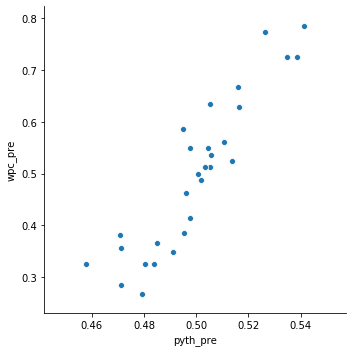

In [15]:
sns.relplot(x="pyth_pre", y="wpc_pre", data = NBA17_pre_team)

In [16]:
# Correlation between Pyth win % and Win % for the 1st half of the regular season.
NBA17_pre_team['pyth_pre'].corr(NBA17_pre_team['wpc_pre'])

0.9116645887360971

In [17]:
# Drop unnecessary coulnms 
NBA17_pre_team.drop(['WIN'], axis=1, inplace=True)
NBA17_pre_team.drop(['PTS'], axis=1, inplace=True)
NBA17_pre_team.drop(['PTS_AGN'], axis=1, inplace=True)
NBA17_pre_team.drop(['GAMES_PLAYED'], axis=1, inplace=True)

### We will use the latter half of the 2017 regular season data as a D.V for forecasting

In [18]:
NBA17_post.head()

,GAME_ID,TEAM_NAME,GAME_DATE,PTS,PLUS_MINUS,WIN
12993,21700616,Sacramento Kings,2018-01-11,115,-6.0,0
6178,21700617,Los Angeles Lakers,2018-01-11,93,12.0,1
13594,21700617,San Antonio Spurs,2018-01-11,81,-12.0,0
18071,21700618,Charlotte Hornets,2018-01-12,99,11.0,1
15595,21700618,Utah Jazz,2018-01-12,88,-11.0,0


In [19]:
# Aggregate game level statistics to a team level statistics for forecasting
NBA17_post_team = NBA17_post.groupby(['TEAM_NAME'])['WIN', 'PTS'].sum()

NBA17_post_team.head()


,WIN,PTS
TEAM_NAME,,
Atlanta Hawks,13,4213
Boston Celtics,21,3997
Brooklyn Nets,13,4399
Charlotte Hornets,21,4772
Chicago Bulls,12,4145


In [20]:
NBA17_games_played = NBA17_post.groupby(['TEAM_NAME']).size().reset_index(name ='GAMES_PLAYED')
NBA17_games_played.head()

,TEAM_NAME,GAMES_PLAYED
0,Atlanta Hawks,41
1,Boston Celtics,38
2,Brooklyn Nets,41
3,Charlotte Hornets,43
4,Chicago Bulls,40


In [21]:
NBA17_post_team = pd.merge(NBA17_post_team, NBA17_games_played, on = 'TEAM_NAME')

NBA17_post_team.head()

,TEAM_NAME,WIN,PTS,GAMES_PLAYED
0,Atlanta Hawks,13,4213,41
1,Boston Celtics,21,3997,38
2,Brooklyn Nets,13,4399,41
3,Charlotte Hornets,21,4772,43
4,Chicago Bulls,12,4145,40


In [22]:
NBA17_post_team['wpc_post'] = NBA17_post_team['WIN']/NBA17_post_team['GAMES_PLAYED']

NBA17_post_team.head()

,TEAM_NAME,WIN,PTS,GAMES_PLAYED,wpc_post
0,Atlanta Hawks,13,4213,41,0.317073
1,Boston Celtics,21,3997,38,0.552632
2,Brooklyn Nets,13,4399,41,0.317073
3,Charlotte Hornets,21,4772,43,0.488372
4,Chicago Bulls,12,4145,40,0.300000


In [23]:
# Drop unnecessary coulnms
NBA17_post_team.drop(['WIN'], axis=1, inplace=True)
NBA17_post_team.drop(['PTS'], axis=1, inplace=True)
NBA17_post_team.drop(['GAMES_PLAYED'], axis=1, inplace=True)

NBA17_post_team

,TEAM_NAME,wpc_post
0,Atlanta Hawks,0.317073
1,Boston Celtics,0.552632
2,Brooklyn Nets,0.317073
3,Charlotte Hornets,0.488372
4,Chicago Bulls,0.300000
5,Cleveland Cavaliers,0.585366
6,Dallas Mavericks,0.230769
7,Denver Nuggets,0.609756
8,Detroit Pistons,0.404762
9,Golden State Warriors,0.625000


 ### Merge NBA17_pre_team data to NBA17_post_team data

In [24]:
NBA17_post_team = pd.merge(NBA17_post_team, NBA17_pre_team, on=['TEAM_NAME'])

NBA17_post_team.head()

,TEAM_NAME,wpc_post,wpc_pre,pyth_pre
0,Atlanta Hawks,0.317073,0.268293,0.479149
1,Boston Celtics,0.552632,0.772727,0.526273
2,Brooklyn Nets,0.317073,0.365854,0.485075
3,Charlotte Hornets,0.488372,0.384615,0.495390
4,Chicago Bulls,0.300000,0.357143,0.471085


Text(0.5, 1.0, 'Correlation: Pre-win% vs Post-win%')

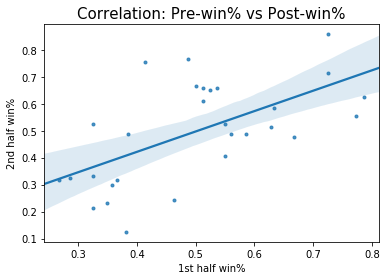

In [25]:
# Let's plot the variables and fit the model using wpc_pre as I.V
sns.regplot(x='wpc_pre', y='wpc_post', data=NBA17_post_team,  marker='.')
plt.xlabel('1st half win%')
plt.ylabel('2nd half win%')
plt.title("Correlation: Pre-win% vs Post-win%", fontsize=15)

In [26]:
WinPct_lm = smf.ols(formula = 'wpc_post ~ wpc_pre', data=NBA17_post_team).fit()
WinPct_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               wpc_post   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     15.40
Date:                Wed, 06 Jan 2021   Prob (F-statistic):           0.000541
Time:                        13:42:06   Log-Likelihood:                 14.429
No. Observations:                  29   AIC:                            -24.86
Df Residuals:                      27   BIC:                            -22.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1191      0.100      1.186      0.246      -0.087       0.325
wpc_pre        0.7558      0.193      3.924      0.001       0.361       1.151
==============================================================================
Omnibus:                        0.868   Durbin-Watson:                   2.640
Prob(Omnibus):                  0.648   Jarque-Bera (JB):                0.904
Skew:                           0.316   Prob(JB):                        0.637
Kurtosis:                       2.409   Cond. No.                         8.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Correlation: Pyth win% vs Post-win%')

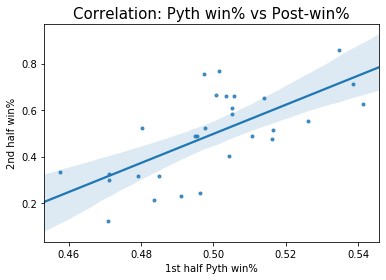

In [27]:
# Let's plot the variables and fit the model using Pyth% as I.V
sns.regplot(x='pyth_pre', y='wpc_post', data=NBA17_post_team,  marker='.')
plt.xlabel('1st half Pyth win%')
plt.ylabel('2nd half win%')
plt.title("Correlation: Pyth win% vs Post-win%", fontsize=15)

In [28]:
PythWin_lm = smf.ols(formula = 'wpc_post ~ pyth_pre', data=NBA17_post_team).fit()
PythWin_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               wpc_post   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     23.86
Date:                Wed, 06 Jan 2021   Prob (F-statistic):           4.15e-05
Time:                        13:42:07   Log-Likelihood:                 17.068
No. Observations:                  29   AIC:                            -30.14
Df Residuals:                      27   BIC:                            -27.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.6293      0.641     -4.105      0.000      -3.944      -1.315
pyth_pre       6.2544      1.280      4.885      0.000       3.627       8.881
==============================================================================
Omnibus:                        1.068   Durbin-Watson:                   2.689
Prob(Omnibus):                  0.586   Jarque-Bera (JB):                0.898
Skew:                           0.166   Prob(JB):                        0.638
Kurtosis:                       2.204   Cond. No.                         61.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
from statsmodels.iolib.summary2 import summary_col
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}"}
Header = ['1','2']
Table_1 = summary_col([WinPct_lm,PythWin_lm,],\
                      regressor_order=['Intercept','pyth_pre','wpc_pre'],model_names = Header)
print(Table_1)


             1        2    
---------------------------
Intercept 0.1191   -2.6293 
          (0.1004) (0.6405)
pyth_pre           6.2544  
                   (1.2804)
wpc_pre   0.7558           
          (0.1926)         
Standard errors in
parentheses.


## The End